In [3]:
!pip install opencv-python matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from google.colab.patches import cv2_imshow


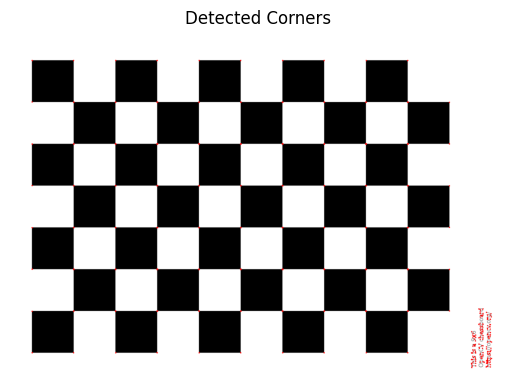

In [4]:

# Download an image suitable for corner detection
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/chessboard.png"
urllib.request.urlretrieve(url, "chessboard.png")

img = cv2.imread("chessboard.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect corners using Harris Corner Detector
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Show image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Detected Corners")
plt.axis("off")
plt.show()

Number of Shi-Tomasi corners detected: 309


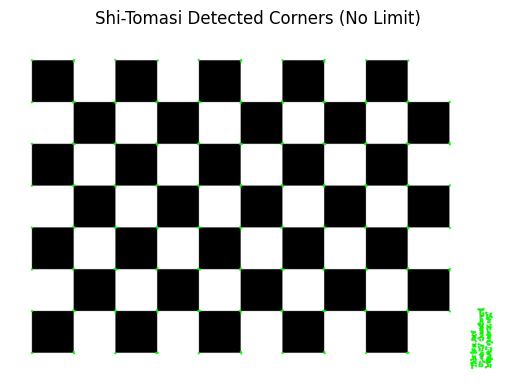

In [9]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect corners using Shi-Tomasi
# Set maxCorners very high to avoid restriction
corners = cv2.goodFeaturesToTrack(
    gray,
    maxCorners=0,              # 0 means no enforced limit
    qualityLevel=0.01,         # minimum accepted corner quality
    minDistance=5              # smaller distance = more dense detection
)
corners = corners.astype(int)

# Print number of detected corners
print("Number of Shi-Tomasi corners detected:", len(corners))

# Draw detected corners
shi_tomasi_img = img.copy()
for i in corners:
    x, y = i.ravel()
    cv2.circle(shi_tomasi_img, (x, y), 4, (0, 255, 0), -1)

# Display result
plt.imshow(cv2.cvtColor(shi_tomasi_img, cv2.COLOR_BGR2RGB))
plt.title("Shi-Tomasi Detected Corners (No Limit)")
plt.axis("off")
plt.show()


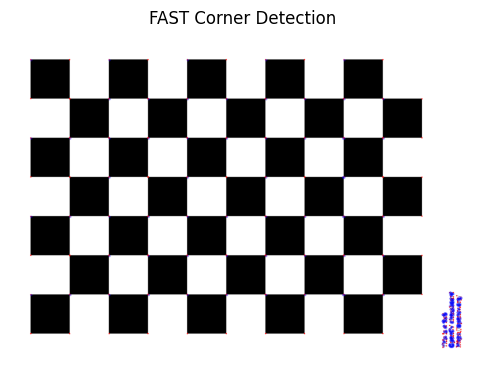

Total FAST keypoints detected: 382


In [7]:
# FAST Corner Detection
fast = cv2.FastFeatureDetector_create()

# Detect keypoints
keypoints = fast.detect(gray, None)

# Draw keypoints on the image
fast_img = cv2.drawKeypoints(img, keypoints, None, color=(255, 0, 0))

# Display results
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(fast_img, cv2.COLOR_BGR2RGB))
plt.title("FAST Corner Detection")
plt.axis("off")
plt.show()

print("Total FAST keypoints detected:", len(keypoints))


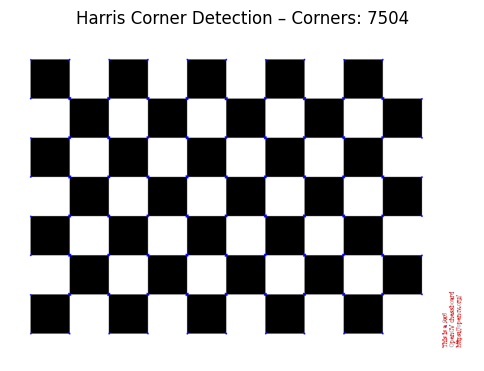

Harris corners detected: 7504


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Harris Corner Detection (Optimized for Less Noise Sensitivity) ---

# Convert to grayscale if not already
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 1: Smooth the image to reduce noise
gray_blur = cv2.GaussianBlur(gray, (9, 9), 2)

# Step 2: Apply the Harris detector
dst = cv2.cornerHarris(gray_blur, blockSize=7, ksize=5, k=0.12)

# Step 3: Dilate corner points for better visibility
dst = cv2.dilate(dst, None)

# Step 4: Threshold to select strong corners
threshold = 0.2 * dst.max()   # Higher threshold → fewer, stronger corners

# Step 5: Mark detected corners on a copy of the image
harris_img = img.copy()
harris_img[dst > threshold] = [255, 0, 0]  # Red marks for corners

# Step 6: Count detected corners
corner_count = np.sum(dst > threshold)

# Step 7: Display the result
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(harris_img, cv2.COLOR_BGR2RGB))
plt.title(f"Harris Corner Detection – Corners: {corner_count}")
plt.axis("off")
plt.show()

print("Harris corners detected:", corner_count)


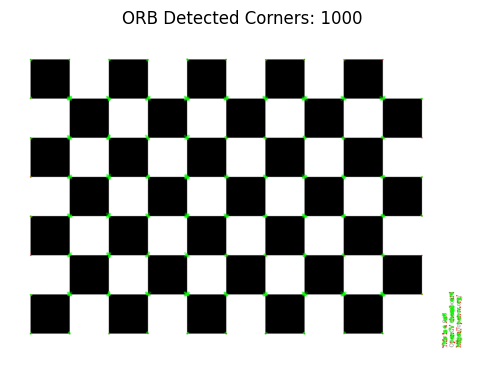

ORB keypoints detected: 1000


In [19]:
# --- ORB Corner Detection (Fixed) ---

# Ensure correct grayscale conversion and type
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create(nfeatures=1000)

# Detect keypoints (use the color image for safety)
orb_keypoints = orb.detect(img, None)

# Draw detected keypoints
orb_img = cv2.drawKeypoints(img, orb_keypoints, None, color=(0, 255, 0), flags=0)

# Display result
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(orb_img, cv2.COLOR_BGR2RGB))
plt.title(f"ORB Detected Corners: {len(orb_keypoints)}")
plt.axis("off")
plt.show()

print("ORB keypoints detected:", len(orb_keypoints))


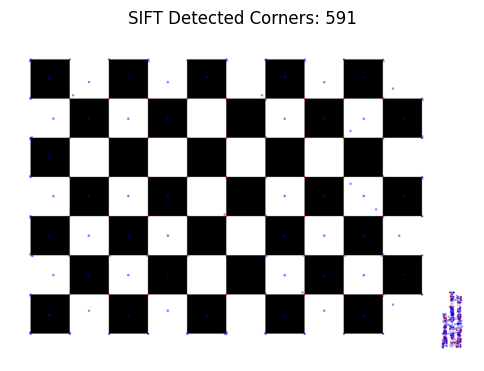

SIFT keypoints detected: 591


In [21]:
# --- SIFT Corner Detection (Replacement for SURF) ---

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints
sift_keypoints, _ = sift.detectAndCompute(gray, None)

# Draw detected keypoints
sift_img = cv2.drawKeypoints(img, sift_keypoints, None, color=(255, 0, 0), flags=0)

# Display result
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(sift_img, cv2.COLOR_BGR2RGB))
plt.title(f"SIFT Detected Corners: {len(sift_keypoints)}")
plt.axis("off")
plt.show()

print("SIFT keypoints detected:", len(sift_keypoints))


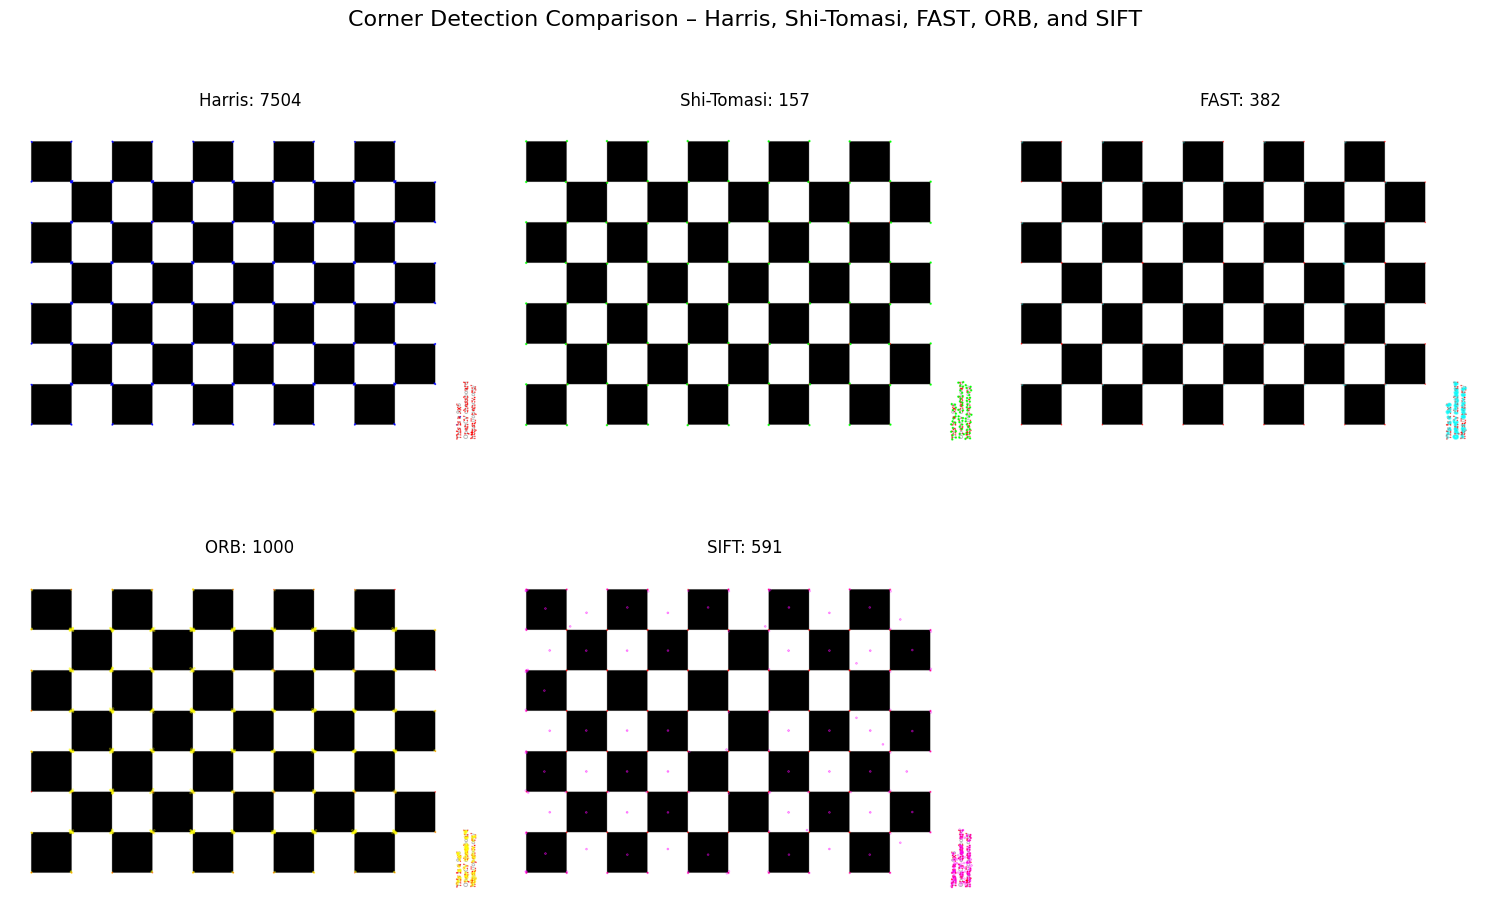

Harris corners detected: 7504
Shi-Tomasi corners detected: 157
FAST keypoints detected: 382
ORB keypoints detected: 1000
SIFT keypoints detected: 591


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Make sure we have a grayscale copy
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === 1. Harris Corner Detector ===
gray_blur = cv2.GaussianBlur(gray, (9, 9), 2)
dst = cv2.cornerHarris(gray_blur, blockSize=7, ksize=5, k=0.12)
dst = cv2.dilate(dst, None)
threshold = 0.2 * dst.max()
harris_img = img.copy()
harris_img[dst > threshold] = [255, 0, 0]
harris_corners = np.sum(dst > threshold)

# === 2. Shi-Tomasi Corner Detector ===
shi_tomasi_corners = cv2.goodFeaturesToTrack(gray, maxCorners=0, qualityLevel=0.01, minDistance=10)
shi_tomasi_img = img.copy()
if shi_tomasi_corners is not None:
    shi_tomasi_corners = shi_tomasi_corners.astype(int)
    for c in shi_tomasi_corners:
        x, y = c.ravel()
        cv2.circle(shi_tomasi_img, (x, y), 4, (0, 255, 0), -1)
shi_count = 0 if shi_tomasi_corners is None else len(shi_tomasi_corners)

# === 3. FAST Detector ===
fast = cv2.FastFeatureDetector_create()
fast_kp = fast.detect(gray, None)
fast_img = cv2.drawKeypoints(img, fast_kp, None, color=(255, 255, 0))
fast_count = len(fast_kp)

# === 4. ORB Detector ===
orb = cv2.ORB_create(nfeatures=1000)
orb_kp = orb.detect(img, None)
orb_img = cv2.drawKeypoints(img, orb_kp, None, color=(0, 255, 255))
orb_count = len(orb_kp)

# === 5. SIFT Detector ===
sift = cv2.SIFT_create()
sift_kp, _ = sift.detectAndCompute(gray, None)
sift_img = cv2.drawKeypoints(img, sift_kp, None, color=(255, 0, 255))
sift_count = len(sift_kp)

# === Display all results in a 2x3 grid ===
images = [
    (harris_img, f"Harris: {harris_corners}"),
    (shi_tomasi_img, f"Shi-Tomasi: {shi_count}"),
    (fast_img, f"FAST: {fast_count}"),
    (orb_img, f"ORB: {orb_count}"),
    (sift_img, f"SIFT: {sift_count}")
]

plt.figure(figsize=(15, 10))
for i, (img_disp, title) in enumerate(images, 1):
    plt.subplot(2, 3, i)
    plt.imshow(cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

plt.suptitle("Corner Detection Comparison – Harris, Shi-Tomasi, FAST, ORB, and SIFT", fontsize=16)
plt.tight_layout()
plt.show()

# Summary of counts
print(f"Harris corners detected: {harris_corners}")
print(f"Shi-Tomasi corners detected: {shi_count}")
print(f"FAST keypoints detected: {fast_count}")
print(f"ORB keypoints detected: {orb_count}")
print(f"SIFT keypoints detected: {sift_count}")
